# Fraud Transaction Detection

we are going to include these features in our dataset:
TRANSACTION_ID, TX_DATETIME, CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, and TX_FRAUD.

### Transaction generation process
The simulation will consist of five main steps:

Generation of customer profiles: Every customer is different in their spending habits. This will be simulated by defining some properties for each customer. The main properties will be their geographical location, their spending frequency, and their spending amounts. The customer properties will be represented as a table, referred to as the customer profile table.

Generation of terminal profiles: Terminal properties will simply consist of a geographical location. The terminal properties will be represented as a table, referred to as the terminal profile table.

Association of customer profiles to terminals: We will assume that customers only make transactions on terminals that are within a radius of r of their geographical locations. This makes the simple assumption that a customer only makes transactions on terminals that are geographically close to their location. This step will consist of adding a feature ‘list_terminals’ to each customer profile, that contains the set of terminals that a customer can use.

Generation of transactions: The simulator will loop over the set of customer profiles, and generate transactions according to their properties (spending frequencies and amounts, and available terminals). This will result in a table of transactions.

Generation of fraud scenarios: This last step will label the transactions as legitimate or genuine. This will be done by following three different fraud scenarios.

### Customer profile generation 
CUSTOMER_ID: The customer unique ID

(x_customer_id,y_customer_id): A pair of real coordinates (x_customer_id,y_customer_id) in a 100 * 100 grid, that defines the geographical location of the customer

(mean_amount, std_amount): The mean and standard deviation of the transaction amounts for the customer, assuming that the transaction amounts follow a normal distribution. The mean_amount will be drawn from a uniform distribution (5,100) and the std_amount will be set as the mean_amount divided by two.

mean_nb_tx_per_day: The average number of transactions per day for the customer, assuming that the number of transactions per day follows a Poisson distribution. This number will be drawn from a uniform distribution (0,4).

In [1]:
import pandas as pd
import numpy as np

import os
import random

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid',{'axes.facecolor':'0.9'})

In [2]:

def customer_profile_generator(nb_customer, random_state=0):
    np.random.seed(random_state)
    customer_id_properties = []
    for customer in range(nb_customer):
        customer_id = customer
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        mean_amount = np.random.uniform(5,100)
        std_amount = mean_amount/2 #Arbitary value
        mean_nb_tx_per_day = np.random.uniform(1,5)
        customer_id_properties.append([customer_id, x_customer_id,
                                       x_customer_id, mean_amount, 
                                       std_amount,mean_nb_tx_per_day])
    customer_profile_table = pd.DataFrame(customer_id_properties,
                                       columns = ['customer_id', 'x_customer_id',
                                                   'y_customer_id', 'mean_amount', 
                                                   'std_amount','mean_nb_tx_per_day'])
    return customer_profile_table
    
    

In [3]:
nb_customers = 5 #input("enter the no of customers")
customer_profile = customer_profile_generator(nb_customers)
customer_profile

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,54.881350,62.262521,31.131260,3.179533
1,1,42.365480,42.365480,46.570785,23.285393,4.567092
2,2,96.366276,96.366276,80.213879,40.106939,3.115580
3,3,56.804456,56.804456,11.748426,5.874213,1.348517
4,4,2.021840,2.021840,78.924891,39.462446,4.480049


Now I have succesfully created the customer profile table lets move to next process

### Terminal profile generation

Each terminal will be defined by the following properties:

TERMINAL_ID: The terminal ID

(x_terminal_id,y_terminal_id): A pair of real coordinates (x_terminal_id,y_terminal_id) in a 100 * 100 grid, that defines the geographical location of the terminal

In [4]:
def terminal_profile_generator(nb_terminals,random_state=0):
    np.random.seed(random_state)
    terminal_properties = []
    for terminal in range(nb_terminals):
        terminal_id = terminal
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)
        terminal_properties.append([terminal_id, x_terminal_id, y_terminal_id])
        
    terminal_profile_table = pd.DataFrame(terminal_properties,columns=['terminal_id',
                                                                      'x_terminal_id',
                                                                      'y_terminal_id'])
    return terminal_profile_table


In [5]:
nb_terminals = 10
terminal_profile = terminal_profile_generator(nb_terminals)
terminal_profile

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152
5,5,79.172504,52.889492
6,6,56.804456,92.559664
7,7,7.103606,8.712930
8,8,2.021840,83.261985
9,9,77.815675,87.001215


In [6]:
def get_list_terminals_within_radius(customer_profile,x_y_terminals,r):
    customer_x_y = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    #let us get the distance now by differentiating
    square_diff = np.square(customer_x_y - x_y_terminals) #applying square to not change the sign values
    #print("square_diff = ",square_diff)
    dist_x_y = np.sqrt(np.sum(square_diff,axis=1))
    #print('dist_x_y = ',dist_x_y)
    available_terminals = list(np.where(dist_x_y<r)[0])
    
    return available_terminals

In [7]:
x_y_terminals = terminal_profile[['x_terminal_id','y_terminal_id']].values.astype(float)
getlist_terminals_within_radius = get_list_terminals_within_radius(customer_profile.iloc[4],x_y_terminals=x_y_terminals,r=50)
getlist_terminals_within_radius

[7]

The list contains the seventh terminal, which is indeed the only one within a radius of 50 of the last customer.

In [8]:
%%capture

terminal_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

#plot locations of the terminals
ax.scatter(terminal_profile.x_terminal_id.values, 
           terminal_profile.y_terminal_id.values,
           color="blue",label="Loacation_terminals")

#plot location of the last customer
customer_id = 4
ax.scatter(customer_profile.iloc[customer_id].x_customer_id,
           customer_profile.iloc[customer_id].y_customer_id,
           color="red", label= "location_last_customer")
ax.legend(loc="upper_left", bbox_to_anchor=(1.05,1))

#Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profile.iloc[customer_id].x_customer_id,
           customer_profile.iloc[customer_id].y_customer_id),
           radius=50 ,color="g", alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0,100])
ax.set_ylim([0,100])

ax.set_xlabel("x_terminal",fontsize=fontsize)
ax.set_ylabel("y_terminal",fontsize=fontsize)

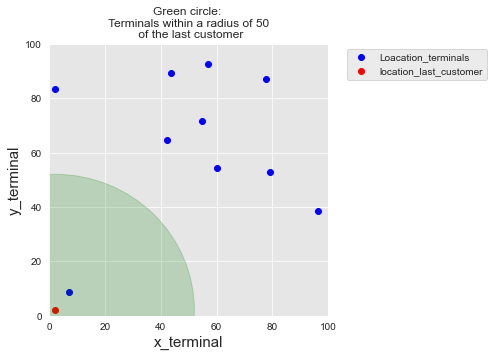

In [9]:
terminal_available_to_customer_fig

In [10]:
customer_profile['available_terminals'] = customer_profile.apply(lambda x: get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1)
customer_profile

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,54.881350,62.262521,31.131260,3.179533,"[0, 1, 2, 3, 4, 5, 6, 9]"
1,1,42.365480,42.365480,46.570785,23.285393,4.567092,"[0, 1, 2, 3, 5, 7]"
2,2,96.366276,96.366276,80.213879,40.106939,3.115580,"[0, 5, 6, 9]"
3,3,56.804456,56.804456,11.748426,5.874213,1.348517,"[0, 1, 2, 3, 4, 5, 6, 9]"
4,4,2.021840,2.021840,78.924891,39.462446,4.480049,[7]


### Generation of Transactions


The customer profiles now contain all the information that we require to generate transactions. The transaction generation will be done by a function generate_transactions_table that takes as input a customer profile, a starting date, and a number of days for which to generate transactions.


In [11]:
def generate_transactions_table(customer_profile, start_date = "2020-04-01", nb_days = 10):
    
    customer_transactions = []
    
    np.random.seed(customer_profile.customer_id)
    for day in range(nb_days):
        #random nmbr of transactions for that day
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        #for nmbr of transaction on that day, lets generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that 
                # most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2,20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if(time_tx>0) and (time_tx<86400):
                    #amount drawn from normal distribution
                    amount = np.random.normal(customer_profile.mean_amount,customer_profile.std_amount)
                    
                    #if amount is negative, lets take uniform distribution
                    if (amount<0):
                        amount = np.random.uniform(customer_profile.mean_amount,customer_profile.std_amount)
                        
                    amount = np.round(amount,decimals = 2)
                    
                    if len(customer_profile.available_terminals)>0:
                        terminal_id = random.choice(customer_profile.available_terminals)
                    
                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.customer_id, 
                                                      terminal_id, amount])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns=['tx_time_seconds', 'tx_time_days', 'customer_id', 'terminal_id', 'tx_amount'])
    
    if len(customer_transactions)>0:
        customer_transactions['tx_datetime'] = pd.to_datetime(customer_transactions["tx_time_seconds"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['tx_datetime','customer_id', 'terminal_id', 'tx_amount','tx_time_seconds', 'tx_time_days']]
    
    return customer_transactions  

Let us generate transaction for 1st customer

In [12]:
tx_cust_table_0  = generate_transactions_table(customer_profile.iloc[0], start_date = "2020-09-01", nb_days = 5)

tx_cust_table_0

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2020-09-01 17:16:41,0,0,57.55,62201,0
1,2020-09-01 11:25:35,0,6,75.04,41135,0
2,2020-09-01 12:48:00,0,0,107.54,46080,0
3,2020-09-01 16:13:40,0,3,66.05,58420,0
4,2020-09-01 14:27:57,0,0,72.65,52077,0
5,2020-09-02 06:39:44,0,3,74.00,110384,1
6,2020-09-02 12:11:08,0,3,83.45,130268,1
7,2020-09-02 03:18:50,0,2,44.62,98330,1
8,2020-09-02 10:39:17,0,9,109.41,124757,1
9,2020-09-03 20:07:34,0,0,110.05,245254,2


In [13]:
#just a check to above table
customer_profile.iloc[0]

customer_id                                   0
x_customer_id                           54.8814
y_customer_id                           54.8814
mean_amount                             62.2625
std_amount                              31.1313
mean_nb_tx_per_day                      3.17953
available_terminals    [0, 1, 2, 3, 4, 5, 6, 9]
Name: 0, dtype: object

In [14]:
transaction_df = customer_profile.groupby('customer_id').apply(lambda x: generate_transactions_table(x.iloc[0],nb_days=5)).reset_index(drop=True)
transaction_df

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2020-04-01 17:16:41,0,9,57.55,62201,0
1,2020-04-01 11:25:35,0,3,75.04,41135,0
2,2020-04-01 12:48:00,0,4,107.54,46080,0
3,2020-04-01 16:13:40,0,6,66.05,58420,0
4,2020-04-01 14:27:57,0,4,72.65,52077,0
...,...,...,...,...,...,...
68,2020-04-04 13:57:26,4,7,81.59,309446,3
69,2020-04-04 07:55:54,4,7,90.65,287754,3
70,2020-04-05 06:39:24,4,7,85.18,369564,4
71,2020-04-05 23:03:21,4,7,124.87,428601,4


## Scaling up to a Large Dataset

We now have all the building blocks to generate a larger dataset. Let us write a generate_dataset function, that will take care of running all the previous steps.

In [15]:
import time
def generate_dataset(nb_customers=10000, nb_terminals=1000000, start_date = "2020-04-01", nb_days = 90, r=5):
    
    start_time = time.time()
    customer_profile = customer_profile_generator(nb_customers,random_state=0)
    print("customer_profile_table created : {0:0.2}s".format(time.time()-start_time))
    
    start_time = time.time()
    terminal_profile = terminal_profile_generator(nb_terminals,random_state=1)
    print("terminal_profile_table created: {0:0.2}s".format(time.time()-start_time))
    
    x_y_terminals = terminal_profile[['x_terminal_id','y_terminal_id']].values.astype(float)
    customer_profile['available_terminals'] = customer_profile.apply(lambda x: get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    
    customer_profile['nb_terminals']=customer_profile.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))
    
    start_time = time.time()
    transaction_df = customer_profile.groupby('customer_id').apply(lambda x: generate_transactions_table(x.iloc[0],start_date=start_date,nb_days=nb_days)).reset_index(drop=True)
    print("Transaction_table created : {0:0.2}s".format(time.time()-start_time))
    
    #lets do some sorting 
    transaction_df = transaction_df.sort_values('tx_datetime')
    
    #lets arrange and change indices into transaction_id
    transaction_df.reset_index(inplace=True,drop=True)
    transaction_df.reset_index(inplace=True)
    
    transaction_df.rename(columns = {'index':'transaction_id'}, inplace=True)
    
    return customer_profile, terminal_profile, transaction_df
    

In [16]:
customer_profile, terminal_profile, transaction_df = generate_dataset(nb_customers=5000,
                                                                       nb_terminals=10000,
                                                                       start_date='2020-04-01',
                                                                       nb_days=183,
                                                                       r=5)

customer_profile_table created : 0.12s
terminal_profile_table created: 0.12s
Time to associate terminals to customers: 6.9s
Transaction_table created : 5.6e+02s


In [17]:
transaction_df.shape

(2639566, 7)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Number of transaction'), Text(0.5, 0, 'Time (days)')]

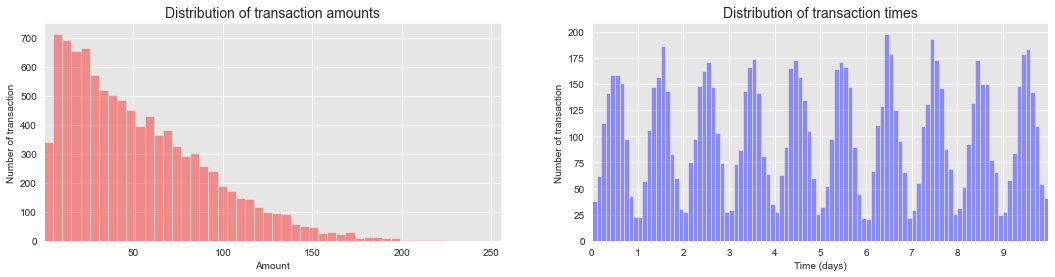

In [19]:
distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transaction_df[transaction_df.tx_time_days<10]['tx_amount'].sample(n=10000).values
time_val = transaction_df[transaction_df.tx_time_days<10]['tx_time_seconds'].sample(n=10000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transaction")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transaction")

The distribution of transaction amounts has most of its mass for small amounts. The distribution of transaction times  follows a gaussian distribution on a daily basis, centered around noon. These two distributions are in accordance with the simulation parameters used in the previous sections.

## Fraud Scenerio Generation

This last step of the simulation adds fraudulent transactions to the dataset, using the following fraud scenarios:

* Scenario 1: Any transaction whose amount is more than 220 is a fraud. This scenario is not inspired by a real-world scenario. Rather, it will provide an obvious fraud pattern that should be detected by any baseline fraud detector. This will be useful to validate the implementation of a fraud detection technique.  

* Scenario 2: Every day, a list of two terminals is drawn at random. All transactions on these terminals in the next 28 days will be marked as fraudulent. This scenario simulates a criminal use of a terminal, through phishing for example. Detecting this scenario will be possible by adding features that keep track of the number of fraudulent transactions on the terminal. Since the terminal is only compromised for 28 days, additional strategies that involve concept drift will need to be designed to efficiently deal with this scenario.     

* Scenario 3: Every day, a list of 3 customers is drawn at random. In the next 14 days, 1/3 of their transactions have their amounts multiplied by 5 and marked as fraudulent. This scenario simulates a card-not-present fraud where the credentials of a customer have been leaked. The customer continues to make transactions, and transactions of higher values are made by the fraudster who tries to maximize their gains. Detecting this scenario will require adding features that keep track of the spending habits of the customer. As for scenario 2, since the card is only temporarily compromised, additional strategies that involve concept drift should also be designed. 

